### Bike 데이터 셋을 활용한 데이터 처리 및 시각화

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("bike/train.csv", parse_dates=['datetime'])
test = pd.read_csv("bike/test.csv", parse_dates=['datetime'])

In [3]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [4]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


##### (실습1) 데이터를 알아가기 위한 여러가지 질문을 작성해 보자.
     01. 데이터 날짜는 언제부터 언제까지 데이터일까?
     02. 실제 빌린 대수(count)와 다른 정보간의 관계는 어떤 관계가 있을까?
         * count와 temp의 관계
     03. count와 다른 변수간의 관계 확인 - corr() 상관계수
         * 가장 높은 상관관계를 갖는 순서로 정렬시켜보자.(pandas)
         * 이를 수평 막대 그래프로 표시해 보자.
           - x축, y축 레이블, 제목을 표시해보자
     04. 계절별 데이터는 어떤 패턴을 가질까?
         * season 특징(정보) 확인해 보기
         * 계절별 데이터를 확인 및 시각화 해 보자.
         * x축을 1,2,3,4만 표시되도록 하자.
     05. 쉬는날과 쉬는 날이 아닌 데이터는 어떤 패턴을 가질까?
         * holiday의 값의 종류와 count를 확인해 보기
     06. weather는 어떤 값을 갖고, 각각의 데이터의 수는 얼마나 될까?
         * weather의 값의 종류와 count를 확인해 보기
     07. 아래의 값의 분포를 2행, 2열로 표시해 보자.
         * temp의 값의 분포는 어떠할까?
         * atemp의 값의 분포는 어떠할까?
         * humidity의 값의 분포는 어떠할까?
         * windspeed의 값의 분포는 어떠할까?
         * 전체 그래프에 대한 제목을 달아보자(suptitle, 크기(size)=20) )
         * 각각의 그래프에 대한 x축 레이블을 넣어보자(크기는 17)
         * 시각화 해보기(matplotlib 활용)
     08. 여러 특징(피처)의 값들의 분포는 어떠할까?
         * temp의 값의 분포는 어떠할까?
         * atemp의 값의 분포는 어떠할까?
         * humidity의 값의 분포는 어떠할까?
         * windspeed의 값의 분포는 어떠할까?
         * 전체 그래프에 대한 제목을 달아보자(suptitle, 크기(size)=20) )
         * 각각의 그래프에 대한 x축 레이블을 넣어보자(크기는 17)

#### 01. 데이터 날짜는 언제부터 언제까지 데이터일까?

In [7]:
import matplotlib.pyplot as plt
import matplotlib

In [8]:
train.datetime.describe()

<ipython-input-8-120836598240>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train.datetime.describe()


count                   10886
unique                  10886
top       2011-06-09 04:00:00
freq                        1
first     2011-01-01 00:00:00
last      2012-12-19 23:00:00
Name: datetime, dtype: object

<AxesSubplot:xlabel='datetime'>

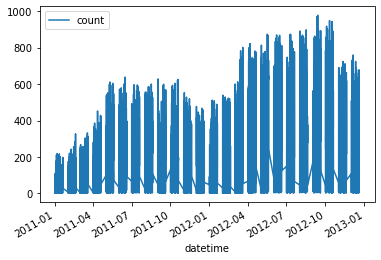

In [9]:
train.plot(x='datetime', y='count')

#### 2. 실제 빌린 대수(count)와 다른 정보간의 관계는 어떤 관계가 있을까?
* 빌린 대수와 온도
* 두 변수가 연속형 변수라면 scatter를 활용하여 관계를 표시할 수 있다.
   * 산점도(scatter plot)로 확인해 보기
   * type은 점으로 표시
   * 투명도를 0.2로 표현

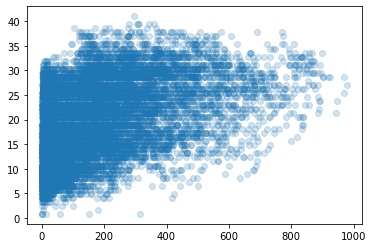

In [10]:
plt.plot(train['count'], train['temp'], 'o', alpha=0.2)

##### seaborn 활용

In [11]:
import seaborn as sns

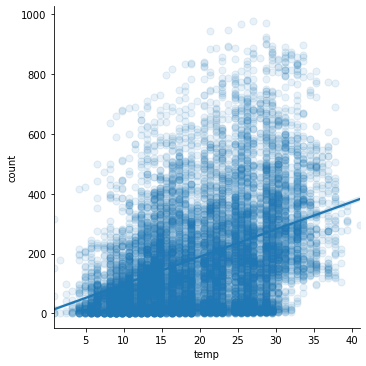

In [12]:
sns.lmplot(x='temp', y='count', data=train,
          scatter_kws={"s":50, "alpha":0.1})

#### 03. count와 다른 변수간의 관계 확인 - corr() 상관계수
* 가장 높은 상관관계를 갖는 순서로 정렬시켜보자.(pandas)
* 이를 수평 막대 그래프로 표시해 보자.
   * x축, y축 레이블, 제목을 표시해보자

In [13]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [14]:
train.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

In [15]:
# 절대값과 값 정렬해보기
train.corr()['count'].abs().sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
humidity      0.317371
season        0.163439
weather       0.128655
windspeed     0.101369
workingday    0.011594
holiday       0.005393
Name: count, dtype: float64

##### 막대 그래프로 시각화 해보기

In [16]:
data = train.corr()['count'].abs().sort_values(ascending=True)
print(data.index)
print(data.values)

Index(['holiday', 'workingday', 'windspeed', 'weather', 'season', 'humidity',
       'atemp', 'temp', 'casual', 'registered', 'count'],
      dtype='object')
[0.00539298 0.01159387 0.10136947 0.1286552  0.16343902 0.31737148
 0.38978444 0.39445364 0.69041357 0.97094811 1.        ]


<BarContainer object of 11 artists>

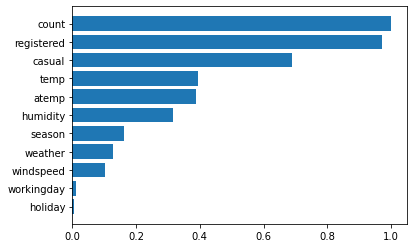

In [17]:
plt.barh(data.index, data.values)

Text(0, 0.5, 'features')

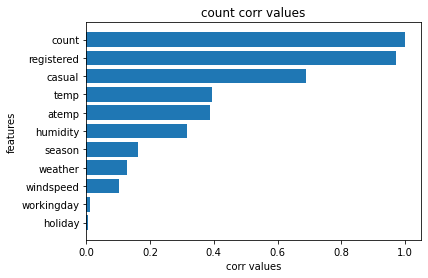

In [18]:
plt.barh(data.index, data.values)
plt.title("count corr values")
plt.xlabel("corr values")
plt.ylabel("features")

#### 04. 계절별 데이터는 어떤 패턴을 가질까?
* season 특징(정보) 확인해 보기
* 계절별 데이터를 확인 및 시각화 해 보자.
* x축을 1,2,3,4만 표시되도록 하자.

In [19]:
# 값과 빈도수
train['season'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

<BarContainer object of 4 artists>

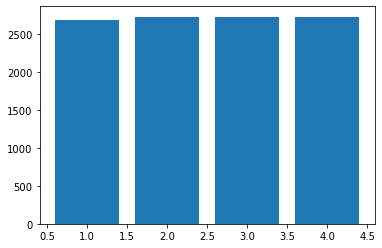

In [20]:
data = train['season'].value_counts()
plt.bar(data.index, data.values)

<BarContainer object of 4 artists>

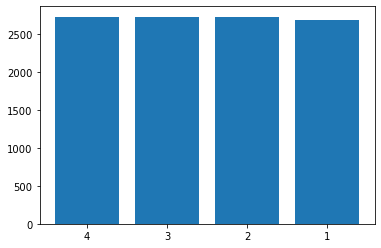

In [21]:
plt.bar(data.index.astype(str), data.values)

#### 05. 쉬는날과 쉬는 날이 아닌 데이터는 어떤 패턴을 가질까?

In [22]:
train['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

<BarContainer object of 2 artists>

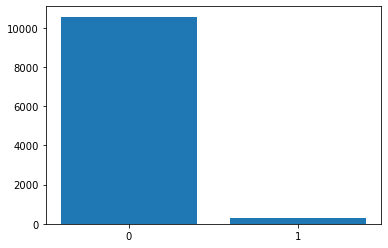

In [23]:
data = train['holiday'].value_counts()
plt.bar(data.index.astype(str), data.values)

##### (생각해보기) 0과 1의 각각의 데이터를 boxplot로 표현할 수 있을까?

#### 06. weather는 어떤 값을 갖고, 각각의 데이터의 수는 얼마나 될까?

In [24]:
train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

<BarContainer object of 4 artists>

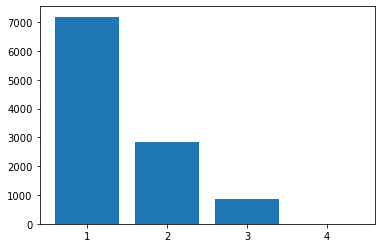

In [25]:
data = train['weather'].value_counts()
plt.bar(data.index.astype(str), data.values)

#### 07. 여러 특징(피처)의 값들의 분포는 어떠할까?
* temp의 값의 분포는 어떠할까?
* atemp의 값의 분포는 어떠할까?
* humidity의 값의 분포는 어떠할까?
* windspeed의 값의 분포는 어떠할까?
* 전체 그래프에 대한 제목을 달아보자(suptitle, 크기(size)=20) )
* 각각의 그래프에 대한 x축 레이블을 넣어보자(크기는 17)

(array([1.313e+03, 4.083e+03, 2.827e+03, 1.540e+03, 6.960e+02, 2.800e+02,
        1.070e+02, 3.100e+01, 6.000e+00, 3.000e+00]),
 array([ 0.     ,  5.69969, 11.39938, 17.09907, 22.79876, 28.49845,
        34.19814, 39.89783, 45.59752, 51.29721, 56.9969 ]),
 <BarContainer object of 10 artists>)

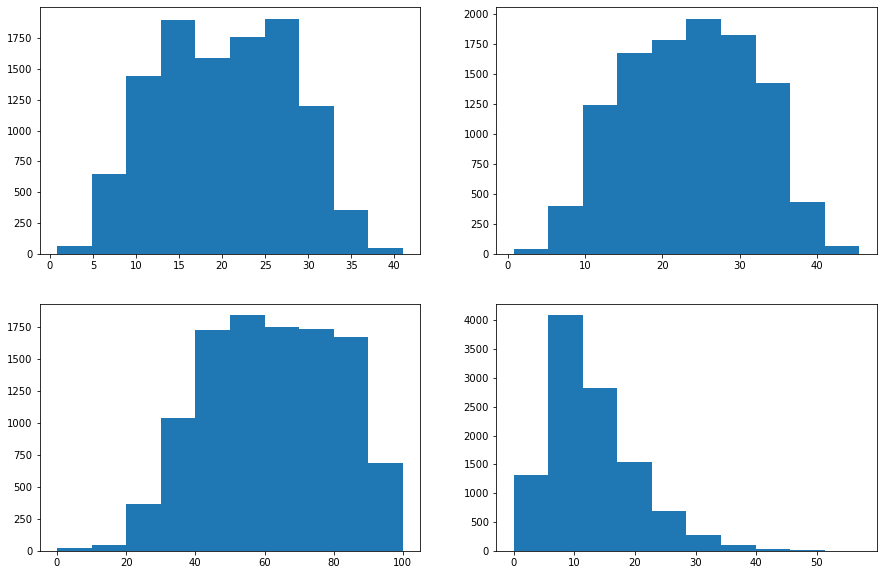

In [26]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(train.temp)

plt.subplot(2,2,2)
plt.hist(train.atemp)

plt.subplot(2,2,3)
plt.hist(train.humidity)

plt.subplot(2,2,4)
plt.hist(train.windspeed)

(array([1.313e+03, 4.083e+03, 2.827e+03, 1.540e+03, 6.960e+02, 2.800e+02,
        1.070e+02, 3.100e+01, 6.000e+00, 3.000e+00]),
 array([ 0.     ,  5.69969, 11.39938, 17.09907, 22.79876, 28.49845,
        34.19814, 39.89783, 45.59752, 51.29721, 56.9969 ]),
 <BarContainer object of 10 artists>)

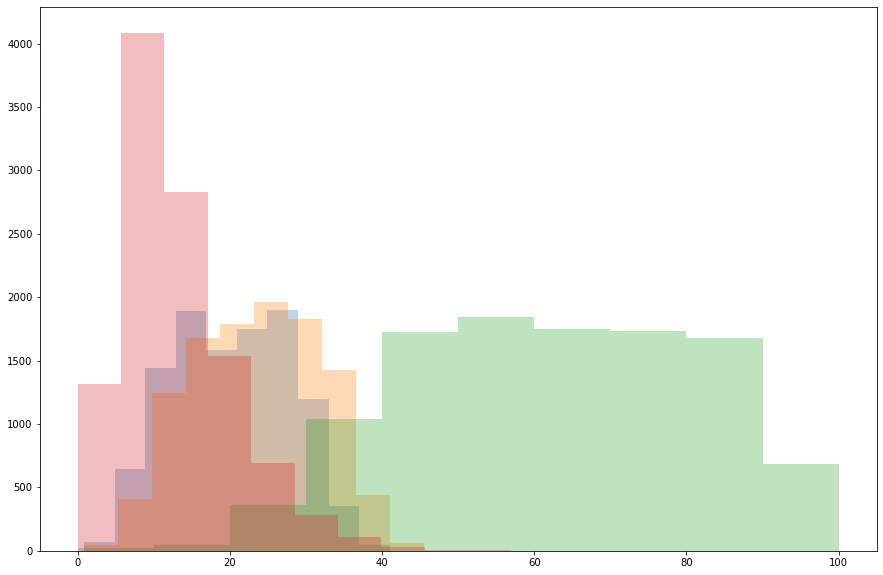

In [27]:
plt.figure(figsize=(15,10))
plt.hist(train.temp, alpha=0.3)
plt.hist(train.atemp, alpha=0.3)
plt.hist(train.humidity, alpha=0.3)
plt.hist(train.windspeed, alpha=0.3)

In [28]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

In [29]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

Text(0.5, 0.98, '피처의 값의 분포')

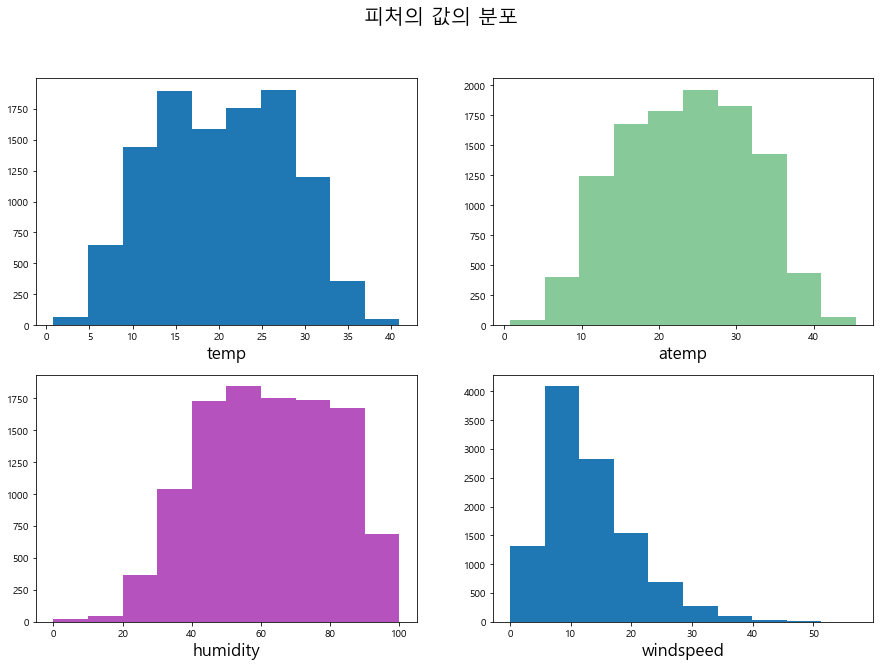

In [30]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(train.temp)
plt.xlabel("temp", size=17)

plt.subplot(2,2,2)
plt.hist(train.atemp, color="#88c999")
plt.xlabel("atemp", size=17)

plt.subplot(2,2,3)
plt.hist(train.humidity, color='#B652BE')
plt.xlabel("humidity", size=17)

plt.subplot(2,2,4)
plt.hist(train.windspeed)
plt.xlabel("windspeed", size=17)

plt.suptitle("피처의 값의 분포", size=20)

#### 08. weather별 데이터의 비율은 어느정도 될까?
* 이에 대해서 pie 그래프로 나타내 보자.
* label은 한글로 '봄', '여름', '가을', '겨울'로 표시해 보자.

In [31]:
print( train['weather'].count() )
all_cnt = train['weather'].count()
print( train['weather'].value_counts() / all_cnt )

10886
1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64


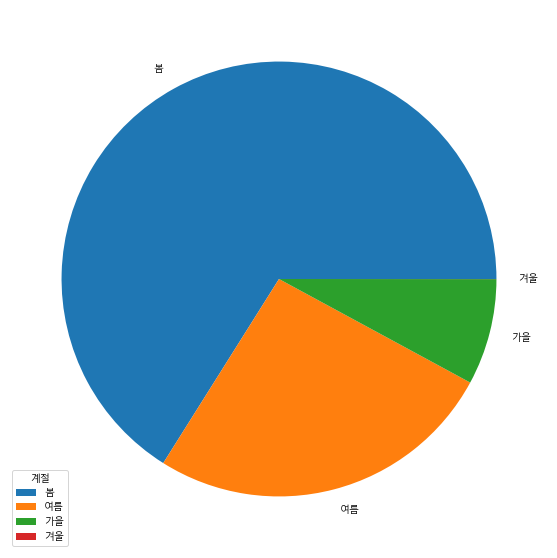

In [32]:
plt.figure(figsize=(10,10))
dat = train['weather'].value_counts() / all_cnt
dat.index=['봄', '여름', '가을', '겨울']
plt.pie(dat.values, labels=dat.index)
plt.legend(title='계절')